<a href="https://colab.research.google.com/github/HJoonKwon/ml_fundamentals/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Nearest Neighbors Algorithm 
- A supervised learning algorithm 
- For classification and regression problems
- To predict for a new data point, we look to see the k closest labeled data points and classify the new data point as the majority class in those k points.

### Pros 
- Fast 
- Interpretable

### Cons
- Lack of capacity to adapt to highly complex relationships between independent(X) and dependent(y) variables.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## 1. Create the dataset

In [2]:
from sklearn import datasets 

In [3]:
iris_data = datasets.load_iris() 

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


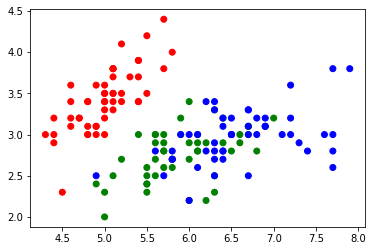

In [4]:
print(iris_data['data'].shape)
print(iris_data['target'])


# Visualization for small test 
color_map = np.array(['r', 'g', 'b'])
plt.scatter(iris_data['data'][:,0], iris_data['data'][:,1], c=color_map[iris_data['target']])

## 2. Data preprocessing and split 

In [5]:
def normalize(data: np.ndarray):
  data = (data - np.mean(data, axis=0))/np.std(data, axis=0)
  return data 

In [6]:
from sklearn.model_selection import train_test_split

X = iris_data['data']
y = iris_data['target']

X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Model Creation 

### 1) Helper Functions 

In [7]:
from collections import Counter

def most_common(data: list):
  '''Returns the most common element in the list'''
  counts = Counter(data)
  return counts.most_common(1)[0][0]

In [8]:
def euclidean(point, data):
  '''Returns Euclidean distances between a point and data'''
  return np.linalg.norm((point-data), axis=1)

### 2) KNN Implementation

In [9]:
class KNeighborsClassifier():
  def __init__(self, k=5, metric=euclidean):
    self.k = k 
    self.metric = metric 
  
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train 
  
  def predict(self, X_test):
    '''Returns the predicted labels using KNN algorithm'''

    # for each data point in X_test
    preds = [] 
    for x in X_test:
      distances = self.metric(x, self.X_train)
    # get the k closest points from X_test based on euclidean distance 
      y_sorted = [y for _, y in sorted(zip(distances, self.y_train), key=lambda x: x[0])]
      y_sorted_k = y_sorted[:self.k]
    # get the most common label in k points 
      pred = most_common(y_sorted_k)
      preds.append(pred)
    # return the predicted label 
    return preds 

  def evaluate(self, X_test, y_test):
    '''Returns the accuracy'''
    preds = self.predict(X_test)
    accuracy = sum(preds==y_test) / len(y_test)
    return accuracy 


### 3) Run the implemented KNN algorithm to our dataset

1.0


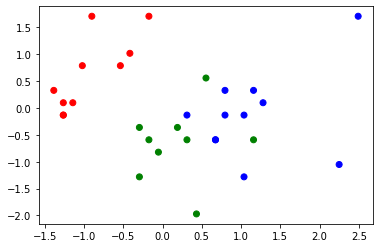

In [10]:
knn = KNeighborsClassifier(k=20)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=color_map[preds])

accuracy = knn.evaluate(X_test, y_test)
print(accuracy)

### 4) Find the optimal k value using evaluation 

Text(0, 0.5, 'Accuracy')

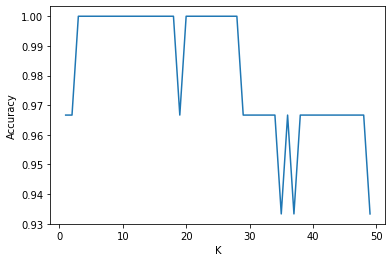

In [11]:
accuracies = [] 
k_candidates = range(1, 50)

for k in k_candidates:
  knn = KNeighborsClassifier(k=k)
  knn.fit(X_train, y_train)
  accuracies.append(knn.evaluate(X_test, y_test))

plt.plot(k_candidates, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')

In [12]:
accuracies = np.array(accuracies)
optimal_idx = np.argmax(accuracies)
k_optimal = k_candidates[optimal_idx]
print(k_optimal)

3


## Reference
- https://towardsdatascience.com/k-nearest-neighbors-algorithm-in-python-by-example-79abc37a4443
- https://towardsdatascience.com/create-your-own-k-nearest-neighbors-algorithm-in-python-eb7093fc6339
- https://realpython.com/knn-python/